# Trabalho de Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

#### 1) Leia o arquivo lemonades.csv usando pandas

In [2]:
limonadas = pd.read_csv('./data/Lemonade2016(2).csv', sep=';')

In [3]:
limonadas.columns = ['Data', 'Local', 'Limao', 'Laranja', 'Temperatura', 'Folhetos', 'Preco']

In [4]:
# Convertendo para o formato de datetime
limonadas['Data'] = pd.to_datetime(limonadas['Data'], format='%m/%d/%Y')

In [5]:
limonadas.head()

,Data,Local,Limao,Laranja,Temperatura,Folhetos,Preco
0,2016-07-01,Park,97,67,70,90.0,0.25
1,2016-07-02,Park,98,67,72,90.0,0.25
2,2016-07-03,Park,110,77,71,104.0,0.25
3,2016-07-04,Beach,134,99,76,98.0,0.25
4,2016-07-05,Beach,159,118,78,135.0,0.25


#### 2) retorne as informações sobre as colunas e as principais estatísticas sobre o dataset

In [6]:
limonadas.dtypes

Data           datetime64[ns]
Local                  object
Limao                   int64
Laranja                 int64
Temperatura             int64
Folhetos              float64
Preco                 float64
dtype: object

In [7]:
limonadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
Data           31 non-null datetime64[ns]
Local          32 non-null object
Limao          32 non-null int64
Laranja        32 non-null int64
Temperatura    32 non-null int64
Folhetos       31 non-null float64
Preco          32 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 1.8+ KB


In [8]:
limonadas.describe()

,Limao,Laranja,Temperatura,Folhetos,Preco
count,32.000000,32.000000,32.000000,31.000000,32.000000
mean,116.156250,80.000000,78.968750,108.548387,0.354687
std,25.823357,21.863211,4.067847,20.117718,0.113137
min,71.000000,42.000000,70.000000,68.000000,0.250000
25%,98.000000,66.750000,77.000000,90.000000,0.250000
50%,113.500000,76.500000,80.500000,108.000000,0.350000
75%,131.750000,95.000000,82.000000,124.000000,0.500000
max,176.000000,129.000000,84.000000,158.000000,0.500000


#### 3)Realize a limpeza do dataset: - verifique se existe valores nulos

In [9]:
limonadas.isna().sum()

Data           1
Local          0
Limao          0
Laranja        0
Temperatura    0
Folhetos       1
Preco          0
dtype: int64

##### - remova duplicatas

In [10]:
print('Valores duplicados:', limonadas.duplicated().sum())
limonadas[limonadas.duplicated()]

Valores duplicados: 1


,Data,Local,Limao,Laranja,Temperatura,Folhetos,Preco
6,2016-07-06,Beach,103,69,82,90.0,0.25


In [11]:
limonadas = limonadas.drop_duplicates()
limonadas[limonadas.duplicated()]

,Data,Local,Limao,Laranja,Temperatura,Folhetos,Preco


In [12]:
limonadas = limonadas.reset_index(drop=True)
limonadas.head(10)

,Data,Local,Limao,Laranja,Temperatura,Folhetos,Preco
0,2016-07-01,Park,97,67,70,90.0,0.25
1,2016-07-02,Park,98,67,72,90.0,0.25
2,2016-07-03,Park,110,77,71,104.0,0.25
3,2016-07-04,Beach,134,99,76,98.0,0.25
4,2016-07-05,Beach,159,118,78,135.0,0.25
5,2016-07-06,Beach,103,69,82,90.0,0.25
6,2016-07-07,Beach,143,101,81,135.0,0.25
7,NaT,Beach,123,86,82,113.0,0.25
8,2016-07-09,Beach,134,95,80,126.0,0.25
9,2016-07-10,Beach,140,98,82,131.0,0.25


##### - trate os elementos faltantes (interpolação e media)

In [13]:
limonadas['Folhetos'] = limonadas['Folhetos'].fillna(limonadas['Folhetos'].mean())

In [14]:
limonadas.isna().sum()

Data           1
Local          0
Limao          0
Laranja        0
Temperatura    0
Folhetos       0
Preco          0
dtype: int64

In [15]:
limonadas[limonadas['Data'].isna()]

,Data,Local,Limao,Laranja,Temperatura,Folhetos,Preco
7,NaT,Beach,123,86,82,113.0,0.25


In [16]:
tmp = limonadas['Data'].apply(lambda t: (t-datetime(1970,1,1)).total_seconds())
tmp.interpolate(inplace=True) 
limonadas['Data'] = pd.to_datetime(tmp, unit='s') 
limonadas['Data'] = limonadas['Data'].apply(lambda t: t.date())
limonadas['Data'] = pd.to_datetime(limonadas['Data'], format='%Y-%m-%d')
limonadas.head(10)

,Data,Local,Limao,Laranja,Temperatura,Folhetos,Preco
0,2016-07-01,Park,97,67,70,90.0,0.25
1,2016-07-02,Park,98,67,72,90.0,0.25
2,2016-07-03,Park,110,77,71,104.0,0.25
3,2016-07-04,Beach,134,99,76,98.0,0.25
4,2016-07-05,Beach,159,118,78,135.0,0.25
5,2016-07-06,Beach,103,69,82,90.0,0.25
6,2016-07-07,Beach,143,101,81,135.0,0.25
7,2016-07-08,Beach,123,86,82,113.0,0.25
8,2016-07-09,Beach,134,95,80,126.0,0.25
9,2016-07-10,Beach,140,98,82,131.0,0.25


#### 4) Adicione uma coluna chamada "Sales" que contém o total de vendas de limão e laranja 

In [17]:
limonadas['Sales'] = limonadas['Laranja'] + limonadas['Limao']
limonadas.head()

,Data,Local,Limao,Laranja,Temperatura,Folhetos,Preco,Sales
0,2016-07-01,Park,97,67,70,90.0,0.25,164
1,2016-07-02,Park,98,67,72,90.0,0.25,165
2,2016-07-03,Park,110,77,71,104.0,0.25,187
3,2016-07-04,Beach,134,99,76,98.0,0.25,233
4,2016-07-05,Beach,159,118,78,135.0,0.25,277


#### 5) Adicione uma coluna chamada "Revenue" que calcula o lucro (venda*preço) 

In [18]:
limonadas['Revenue'] = limonadas['Sales'] * limonadas['Preco']
limonadas.head()

,Data,Local,Limao,Laranja,Temperatura,Folhetos,Preco,Sales,Revenue
0,2016-07-01,Park,97,67,70,90.0,0.25,164,41.00
1,2016-07-02,Park,98,67,72,90.0,0.25,165,41.25
2,2016-07-03,Park,110,77,71,104.0,0.25,187,46.75
3,2016-07-04,Beach,134,99,76,98.0,0.25,233,58.25
4,2016-07-05,Beach,159,118,78,135.0,0.25,277,69.25


#### 6) retorne o lucro total 

In [19]:
limonadas['Revenue'].sum()

2138.0

#### 7) escreva uma função que receba dois parâmetros, dataset e temp(int). Se max for 1, ele retorna a máxima temperatura observada no conjunto de dados; se 0, retorna a média do período observado; se -1, retorna a temperatura mínima 


In [20]:
def obter_dados_temperatura(dataset, temp):
    temperatura = dataset['Temperatura']
    if temp == 1: return temperatura.max()
    elif temp == 0: return temperatura.mean()
    elif temp == -1: return temperatura.min()
    else: return 0    

In [21]:
print('Para 1:', obter_dados_temperatura(limonadas, 1))
print('Para 0:', obter_dados_temperatura(limonadas, 0))
print('Para -1:', obter_dados_temperatura(limonadas, -1))

Para 1: 84
Para 0: 78.87096774193549
Para -1: 70


#### 8) escreva uma função que receba dois parametros (dataset, localização) e retorne o dataset com o preço do limão e laranja ajustados em 15% se a localização for 'Park' ou ajustados em 10% se a localização for 'Beach' 

In [22]:
def obter_preco_ajustado(dataset, localizacao):
    novoDataSet = dataset[dataset['Local'] == localizacao].copy()
    if localizacao == 'Park':
        novoDataSet['Preco'] = novoDataSet['Preco'] + (novoDataSet['Preco'] * .15)
        return novoDataSet
    elif localizacao == 'Beach':
        novoDataSet['Preco'] = novoDataSet['Preco'] +  (novoDataSet['Preco'] * 0.1)
        return novoDataSet
    else: return novoDataSet

In [23]:
aux = obter_preco_ajustado(limonadas, 'Park')
aux[aux['Local'] == 'Park'].head()

,Data,Local,Limao,Laranja,Temperatura,Folhetos,Preco,Sales,Revenue
0,2016-07-01,Park,97,67,70,90.0,0.2875,164,41.00
1,2016-07-02,Park,98,67,72,90.0,0.2875,165,41.25
2,2016-07-03,Park,110,77,71,104.0,0.2875,187,46.75
17,2016-07-18,Park,131,92,81,122.0,0.5750,223,111.50
18,2016-07-19,Park,122,85,78,113.0,0.5750,207,103.50


In [24]:
aux = obter_preco_ajustado(limonadas, 'Beach')
aux[aux['Local'] == 'Beach'].head()

,Data,Local,Limao,Laranja,Temperatura,Folhetos,Preco,Sales,Revenue
3,2016-07-04,Beach,134,99,76,98.0,0.275,233,58.25
4,2016-07-05,Beach,159,118,78,135.0,0.275,277,69.25
5,2016-07-06,Beach,103,69,82,90.0,0.275,172,43.00
6,2016-07-07,Beach,143,101,81,135.0,0.275,244,61.00
7,2016-07-08,Beach,123,86,82,113.0,0.275,209,52.25


#### 9) escreva uma função que receba o dataset como parâmetro e retorne o dataset com uma coluna a mais que mostre o rank de temperatura. O dataset retornado precisa estar ordenado de acordo com rank 

In [25]:
def obter_rank_temperatura(dataset, campo):
    dataset['Rank'] = dataset[campo].rank(ascending = 0)
    return dataset.sort_values(by=['Rank']);

In [26]:
limonadas = obter_rank_temperatura(limonadas, 'Temperatura')
limonadas.head()

,Data,Local,Limao,Laranja,Temperatura,Folhetos,Preco,Sales,Revenue,Rank
24,2016-07-25,Park,156,113,84,135.0,0.50,269,134.50,1.5
11,2016-07-12,Beach,130,95,84,99.0,0.25,225,56.25,1.5
25,2016-07-26,Park,176,129,83,158.0,0.35,305,106.75,3.5
10,2016-07-11,Beach,162,120,83,135.0,0.25,282,70.50,3.5
23,2016-07-24,Park,121,82,82,117.0,0.50,203,101.50,8.0


#### 10) Imprima um gráfico de linha que retorne o lucro ao longo do tempo 

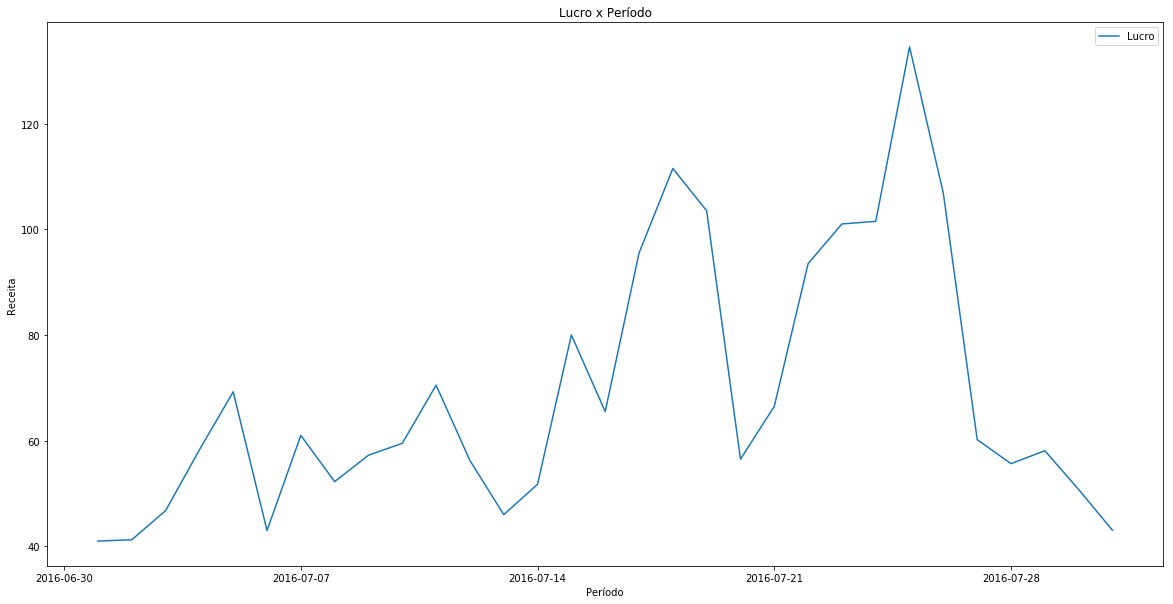

In [81]:
limonadas = limonadas.sort_values(by='Data')
plt.rcParams["figure.figsize"] = [20,10]
plt.plot(limonadas['Data'], limonadas['Revenue'], label='Lucro')
plt.xlabel('Período')
plt.ylabel('Receita')
plt.title("Lucro x Período")
plt.legend()
plt.show()

Neste gráfico podemos observar que existem períodos de grande alta e de grande baixa, parece se tratar de algo sazonal, específico de pequenos períodos que talvez valham a pena serem analisados mais de perto.

#### 11) crie um scatter-plot leaflets x sales. Existe alguma correlação entre os dados? 

Text(0.5,1,'Comparação Folhetos x Vendas')

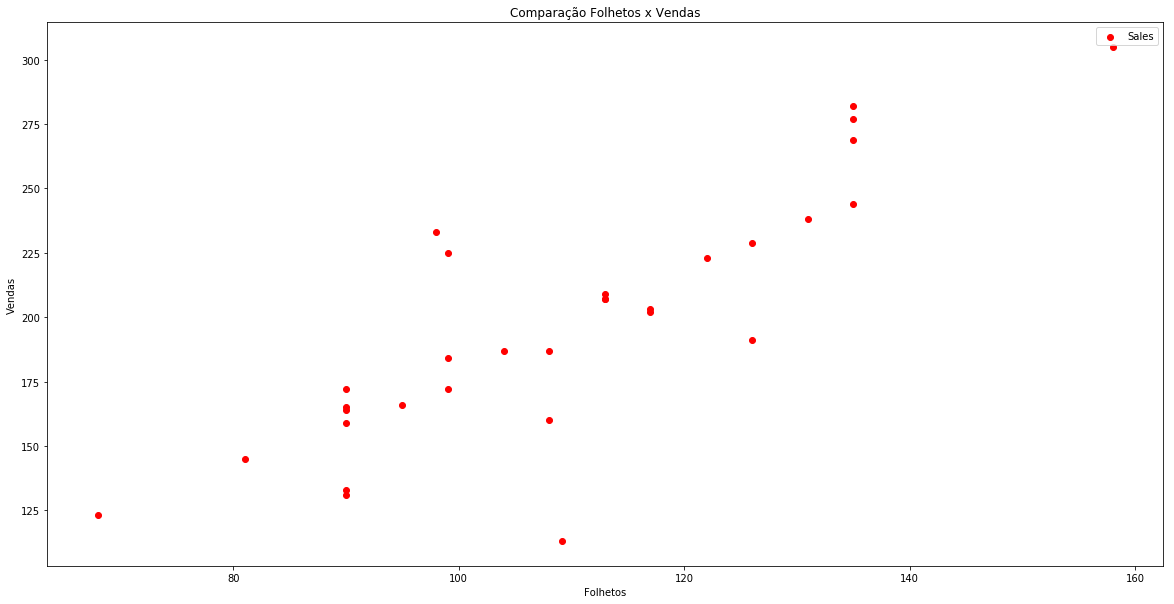

In [28]:
plt.scatter(limonadas['Folhetos'], limonadas['Sales'], color='r')
plt.legend()
plt.xlabel("Folhetos")
plt.ylabel("Vendas")
plt.title("Comparação Folhetos x Vendas")

Sim, a correlação apresentada no gráfico é que quanto maior for as entregas de folhetos, maior será as vendas. Esta correlação mostra que esta ação é eficiente para as vendas.

#### 12) crie um histograma que mostre o lucro (revenue) com 10 bins

In [29]:
def obter_histograma(atributo, dados, titulo, bins):
    plt.hist(dados[atributo], density=False, facecolor='g', alpha=0.75, bins=bins)

    plt.axvline(dados[atributo].mean(), color='k', linestyle='dashed', linewidth=1)
    plt.xlabel(titulo)
    plt.ylabel(atributo)
    plt.title('Histograma de ' + atributo)
    plt.grid(True)
    plt.show()

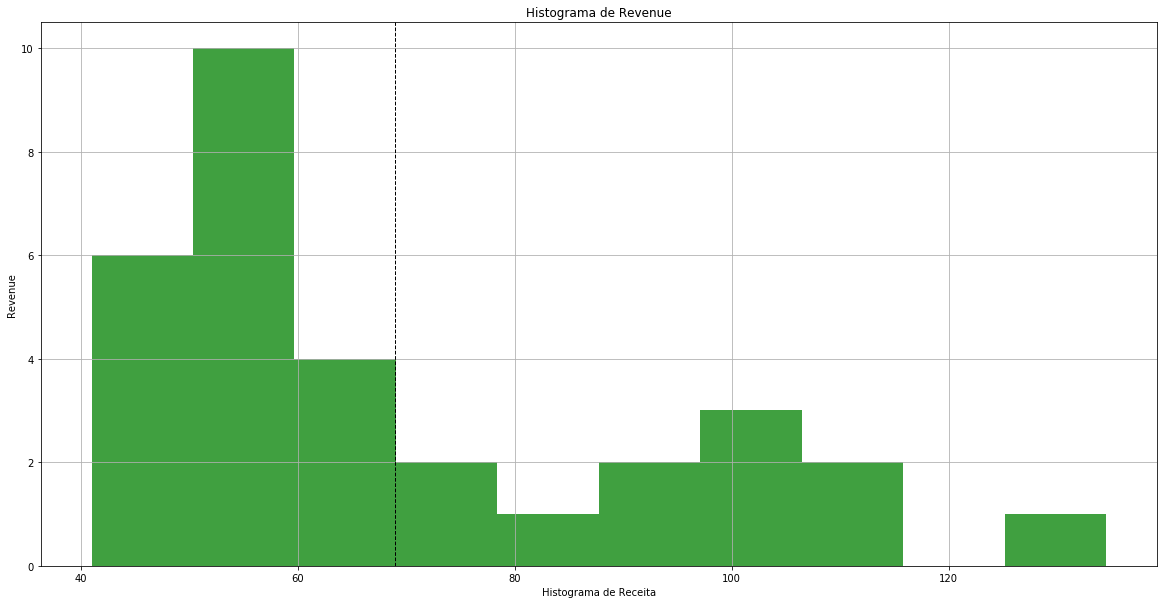

In [30]:
obter_histograma('Revenue', limonadas, 'Histograma de Receita', 10)

Neste histograma, podemos avaliar que os valores do lucro estão distribuídos entre o menor e o maior valor, além de que possui um buraco em 120. E podemos afirmar que a maior parte do lucro está entre 40 e 60 por dia. 

#### 13) crie um gráfico de linha que compute o lucro por tipo de fruta ao longo do tempo

In [31]:
limonadas['LucroLimao'] = limonadas['Limao'] * limonadas['Preco']
limonadas['LucroLaranja'] = limonadas['Laranja'] * limonadas['Preco']
limonadas.head()

,Data,Local,Limao,Laranja,Temperatura,Folhetos,Preco,Sales,Revenue,Rank,LucroLimao,LucroLaranja
0,2016-07-01,Park,97,67,70,90.0,0.25,164,41.00,30.5,24.25,16.75
1,2016-07-02,Park,98,67,72,90.0,0.25,165,41.25,28.0,24.50,16.75
2,2016-07-03,Park,110,77,71,104.0,0.25,187,46.75,29.0,27.50,19.25
3,2016-07-04,Beach,134,99,76,98.0,0.25,233,58.25,25.0,33.50,24.75
4,2016-07-05,Beach,159,118,78,135.0,0.25,277,69.25,20.0,39.75,29.50


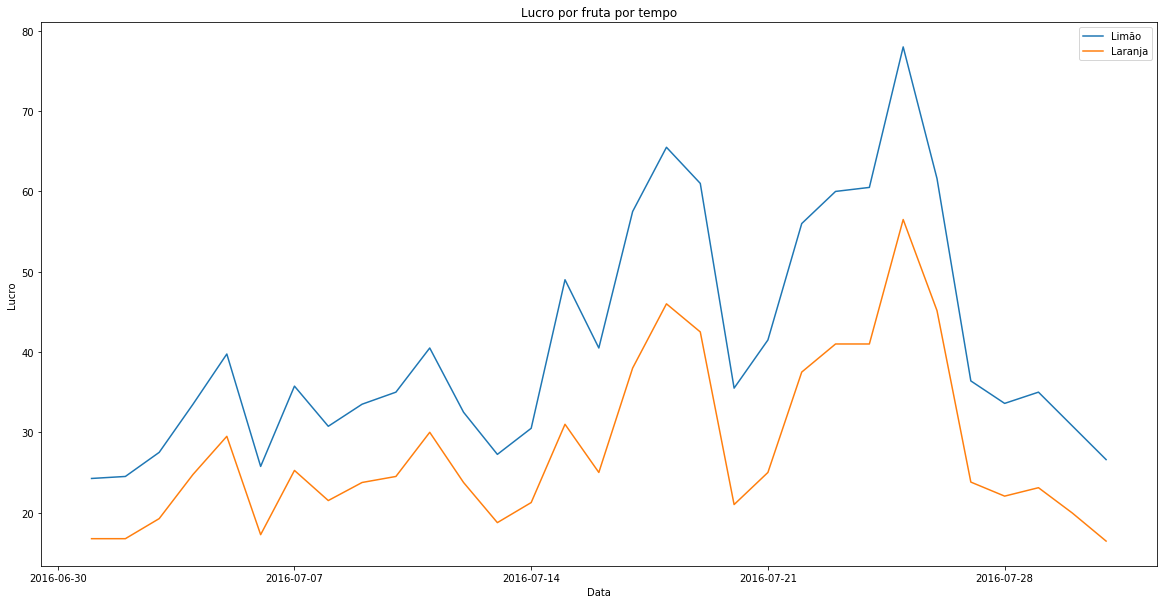

In [32]:
lucroLimao = limonadas['LucroLimao']
lucroLaranja = limonadas['LucroLaranja']

lucroLimao.index = limonadas['Data']
lucroLaranja.index = limonadas['Data']

plt.plot(lucroLimao.index, lucroLimao, label='Limão')
plt.plot(lucroLaranja.index, lucroLaranja, label='Laranja')

plt.xlabel('Data')
plt.ylabel('Lucro')
plt.title("Lucro por fruta por tempo")
plt.legend()
plt.show()

Podemos observar que a venda de limão é maior que a de laranja, mas que a relação de venda entre as frutas são proporcionais, ou seja, quando a venda de limão aumenta, a venda de laranja aumenta com a mesma proporção.

#### 14) usando regressão linear, prediga vendas a partir de: temperature

In [33]:
class LinearRegression():
    
    def cost_function(self,X,y,theta):
        m = len(y) #número de amostras
        J = 0 # custo
        
        for i in range(m):
            J = J + ((theta[0] + theta[1] * X[1][i] - y[i])) ** 2
        
        return J*(1/(2*m))
    
    def gradient_descent(self,X,y,theta,alpha,num_iter):
        m = len(y)
        J_history = np.zeros(num_iter)
        temp0 = 0
        temp1 = 0
        
        for k in range(num_iter):
        
            for i in range(m):
                temp0 = temp0 - alpha * (1/m * (theta[0] + theta[1] * X[1][i] - y[i]))
                temp1 = temp1 - alpha * (1/m * (theta[0] + theta[1] * X[1][i] - y[i]))*X[1][i]
                theta[0] = temp0
                theta[1] = temp1
                
            J_history[k] = self.cost_function(X,y,theta)
    
        return theta,J_history

In [34]:
regressaoLinear = LinearRegression()

In [35]:
def desenhar_grafico_vendas_por_variavel(variavel, dataset):
    data_plot = alt.Chart(dataset).mark_circle(size=60).encode(
        x=  variavel + ':Q',
        y='Sales:Q'
    )
    return data_plot

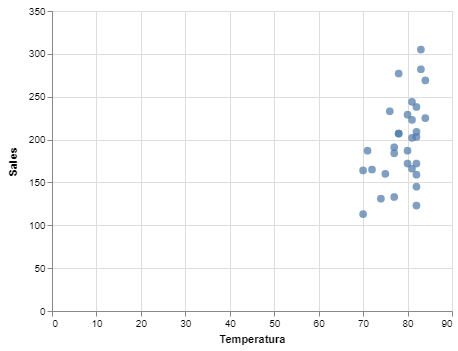

In [36]:
data_plot = desenhar_grafico_vendas_por_variavel('Temperatura', limonadas)
data_plot

A maior concentração de vendas ocorre quando a temperatura está perto dos 80 Graus Fahrenheit (F), valor equivalente a 27 graus Celsius.

In [231]:
def predizer_vendas_por_variavel(variavel, dataset):
    regressaoLinear = LinearRegression()
    iterations = 1500
    alpha = 0.0005
    
    train=dataset.sample(frac=0.7,random_state=200)
    test=dataset.drop(train.index)
    
    x_train = pd.DataFrame({'Auxiliar': np.ones(len(train[variavel])), variavel: train[variavel]})
    y_train = train['Sales']
    
    x_test = pd.DataFrame({'Auxiliar': np.ones(len(test[variavel])), variavel: test[variavel]})
    y_test = test['Sales']
    
    x_train.columns = range(x_train.shape[1]) 
    
    x_train = x_train.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)      
    
    theta = np.zeros(len(x_train.columns))
    
    theta_lr, custo_h = regressaoLinear.gradient_descent(x_train, y_train, theta, alpha, iterations)
    
    Yfit = np.matmul(x_test,theta_lr)
    fit_plot = pd.DataFrame({'X':x_test[variavel],'Y':Yfit})
    
    polynomial_fit = alt.Chart(fit_plot).mark_line(color='red').encode(
        x=alt.X('X',axis=alt.Axis(title=variavel)),
        y=alt.Y('Y',axis=alt.Axis(title='Vendas'))
    )
    
    data_plot = desenhar_grafico_vendas_por_variavel(variavel, test)   
    
    return data_plot + polynomial_fit, mean_squared_error(y_test, Yfit)

Erro médio 1999.2598555390796


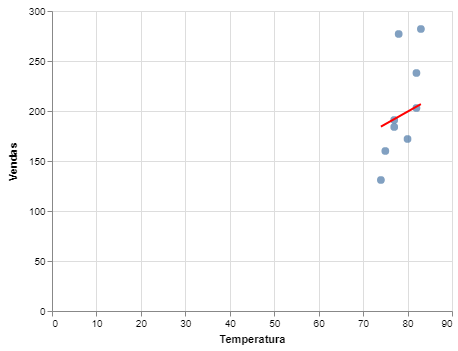

In [232]:
chart, erro = predizer_vendas_por_variavel('Temperatura', limonadas)
print('Erro médio', erro)
chart

Embora exista uma linha no centro dos pontos, utilizar apenas a temperatura para predizer as vendas não será muito eficiente, visto que temos diversos dados dispersos além da linha traçada

#### 14) usando regressão linear, prediga vendas a partir de: Leaflets

Erro médio 984.9850646833163


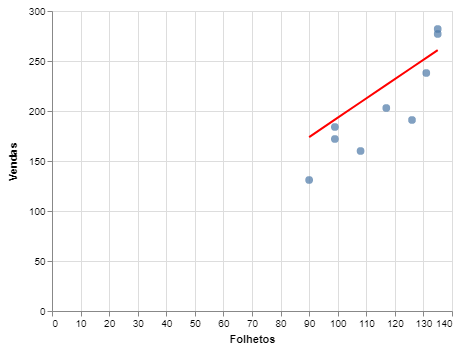

In [233]:
chart, erro = predizer_vendas_por_variavel('Folhetos', limonadas)
print('Erro médio', erro)
chart

Podemos observar que a correlação entre folhetos e vendas é positiva, quando a variável “folhetos” (X) aumenta, a variável “vendas” (Y) também aumenta.

#### 14) usando regressão linear, prediga vendas a partir de: Price

Erro médio 11359.51543916838


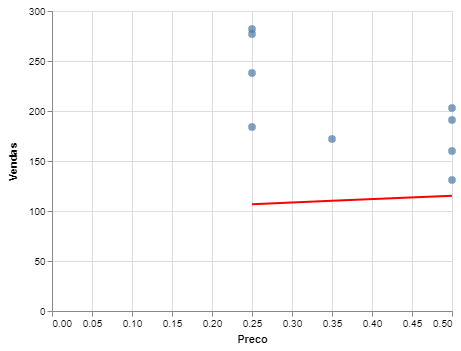

In [234]:
chart, erro = predizer_vendas_por_variavel('Preco', limonadas)
print('Erro médio', erro)
chart

Aqui vemos que não faz sentido utilizar apenas o preço para prever as vendas

#### 15) usando regressão linear, prediga vendas a partir das três variáveis juntas

In [69]:
feature_col = ['Preco','Folhetos','Temperatura']
meta_col = ['Sales']

X = limonadas[feature_col].values
y = limonadas[meta_col].values
split_test_size = 0.30

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

In [71]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train.ravel()) # flatten arrays

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
y_pred = lr_model.predict(X_test)
y_pred

array([171.17165832, 122.94604346, 196.43979809, 202.98378463,
       250.05910738, 265.14553287, 154.26701917, 235.94403568,
       190.80275099, 153.9657543 ])

In [73]:
y_test

array([[159],
       [131],
       [203],
       [223],
       [229],
       [238],
       [145],
       [269],
       [184],
       [164]], dtype=int64)

In [74]:
mean_squared_error(y_test,y_pred)

316.2604496097703

Escolhemos preço, folhetos e temperatura como variáveis para predizer as vendas, pois conforme as análises feitas anteriormente são as variáveis que representam melhor correlação.
Dos dados fornecidos, separamos 30% para teste da regressão linear.

Embora o erro esteja alto, os valores são pouco próximos aos valores reais

#### 16) Usando a Regressão Linear implementada em sala como modelo, generalize o algoritmo para que ele possa ser usado para regressão multivariada

In [46]:
class LinearRegression2():
    
    def cost_function(self,X,y,theta):
        m = len(y) #número de amostras
        J = 0. # custo
        #y = np.concatenate( y, axis=0 )
        numero_colunas = len(X.columns)        
        
        for i in range(m):
            calculo_thetas = 0.
            for indice_coluna in range(numero_colunas):
                calculo_thetas += (theta[indice_coluna] * X[indice_coluna][i])                
                
            J = J + (calculo_thetas - y[i]) ** 2
        
        #return J
        return J*(1/(2*m))
    
    def gradient_descent(self,X,y,theta,alpha,num_iter):
        m = len(y)
        J_history = np.zeros(num_iter)
        numero_colunas = len(X.columns)
        
        for k in range(num_iter):        
            for i in range(m):
                calculo_thetas = 0.
                for indice_coluna in range(numero_colunas):
                    calculo_thetas += (theta[indice_coluna] * X[indice_coluna][i])
                
                for indice_coluna in range(numero_colunas):
                    #temp1 = temp1 - alpha * (1/m * (theta[0] + theta[1] * X[1][i] - y[i]))*X[1][i]
                    theta[indice_coluna] = theta[indice_coluna] - alpha * (1/m * (calculo_thetas - y[i])) * X[indice_coluna][i]
                
            J_history[k] = self.cost_function(X,y,theta)
    
        return theta,J_history

In [75]:
regressaoLinear2 = LinearRegression2()
iterations = 10000
alpha = 0.00005

In [76]:
dataFrame = pd.DataFrame(X_train)
dataFrame.insert(0,'auxiliar',np.ones(len(dataFrame)))
dataFrame.head()

,auxiliar,0,1,2
0,1.0,0.25,135.0,78.0
1,1.0,0.50,126.0,77.0
2,1.0,0.25,90.0,82.0
3,1.0,0.25,113.0,78.0
4,1.0,0.25,99.0,84.0


In [77]:
theta = np.zeros(len(dataFrame.columns))
dataFrame.columns = range(dataFrame.shape[1])    
vendas = y_train
theta_lr, custo_h = regressaoLinear2.gradient_descent(dataFrame, vendas, theta, alpha, iterations)
theta_lr

array([-3.89539901e-01, -1.36274314e+00,  1.79657339e+00, -3.41343328e-04])

In [78]:
dataFrame = pd.DataFrame(X_test)
dataFrame.insert(0,'auxiliar',np.ones(len(dataFrame)))
Yfit = np.matmul(dataFrame,theta_lr)
Yfit

array([160.7971154 , 160.59543467, 209.10018559, 218.08339391,
       225.61071462, 234.5928989 , 144.62795484, 241.43782401,
       177.10425698, 160.93748583])

In [79]:
y_test

array([[159],
       [131],
       [203],
       [223],
       [229],
       [238],
       [145],
       [269],
       [184],
       [164]], dtype=int64)

In [80]:
mean_squared_error(y_test,Yfit)

178.03424777092215

A partir da análise do erro quadrático, podemos comparar com o gerado pelo scikit learn e vemos que o nosso modelo parece se ajustar melhor a necessidade de previsão

#### 17) aplique o algoritmo implementado no conjunto de dados consumo cerveja usando as mesmas features para treinamento. Compare os resultados que você obteve com os resultados obtidos através da Scikit Learning.

In [82]:
cerveja = pd.read_csv('./data/Consumo_cerveja.csv', sep=';')

In [83]:
cerveja = cerveja.rename(columns={'Temperatura Media (C)':'meanTemp','Temperatura Minima (C)':'minTemp','Temperatura Maxima (C)':'maxTemp',
                       'Precipitacao (mm)':'precip','Final de Semana':'weekend','Consumo de cerveja (litros)':'consumo'})

In [84]:
cerveja.head()

,Data,meanTemp,minTemp,maxTemp,precip,weekend,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25.461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28.972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30.814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29.799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28.900


In [85]:
cerveja.isna().sum()

Data        0
meanTemp    0
minTemp     0
maxTemp     0
precip      0
weekend     0
consumo     0
dtype: int64

In [86]:
feature_col = ['maxTemp','precip','weekend']
meta_col = ['consumo']

X = cerveja[feature_col].values
y = cerveja[meta_col].values
split_test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

In [87]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train.ravel()) # flatten arrays

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [88]:
y_pred = lr_model.predict(X_test)
y_pred

array([25.5541415 , 27.07130999, 28.11812711, 21.61574405, 27.32462467,
       17.73421627, 22.48352654, 18.87889158, 18.051333  , 20.88146656,
       32.15210511, 26.88919148, 25.24055058, 25.84854213, 20.61445656,
       22.35002154, 28.09073647, 27.09284136, 24.68635901, 28.88653837,
       34.5605008 , 22.01625904, 29.70779574, 19.26100071, 25.01489341,
       24.81986401, 29.22030086, 29.95980645, 22.87120826, 24.21909152,
       24.45055214, 29.88782585, 28.22424147, 32.55570399, 23.61831902,
       27.28447838, 27.48996398, 23.62757067, 25.02012151, 31.62339083,
       27.89047897, 32.29091582, 27.94139194, 24.54762592, 24.81614895,
       31.75689583, 24.75311151, 24.79701447, 26.10838888, 29.23164091,
       29.22030086, 31.77712322, 31.75689583, 33.9597283 , 20.34744656,
       25.8211515 , 31.35638084, 30.75869223, 26.59357011, 24.31631853,
       22.38493973, 27.98462211, 24.82775587, 23.41520851, 29.09202396,
       29.6048987 , 25.1536265 , 19.75542797, 20.14718906, 23.95

In [89]:
mean_squared_error(y_test,y_pred)

5.4808534596126615

In [169]:
iterations = 20000
alpha = 0.01
dataFrame = pd.DataFrame(X_train)
dataFrame.insert(0,'auxiliar',np.ones(len(dataFrame)))
dataFrame.head()

,auxiliar,0,1,2
0,1.0,24.9,28.6,1.0
1,1.0,19.6,0.0,0.0
2,1.0,26.2,0.0,1.0
3,1.0,35.6,0.6,0.0
4,1.0,23.2,1.8,0.0


In [170]:
theta = np.zeros(len(dataFrame.columns))
dataFrame.columns = range(dataFrame.shape[1])    
consumo = y_train
theta_lr, custo_h = regressaoLinear2.gradient_descent(dataFrame, consumo, theta, alpha, iterations)
theta_lr

array([ 6.27348396,  0.66581727, -0.0555987 ,  5.33960939])

In [171]:
dataFrame = pd.DataFrame(X_test)
dataFrame.insert(0,'auxiliar',np.ones(len(dataFrame)))
Yfit = np.matmul(dataFrame,theta_lr)
Yfit

array([25.3824396 , 26.89144313, 27.93451128, 21.45411771, 27.14678701,
       17.5348649 , 22.31968016, 18.72426691, 17.89748683, 20.72171872,
       31.98154193, 26.71407414, 25.0151156 , 25.67073257, 20.45539181,
       22.18651671, 27.91254523, 26.86855764, 24.51687715, 28.72459718,
       34.38404397, 21.85360807, 29.51109105, 19.02026184, 24.86285702,
       24.65004061, 29.05750581, 29.77683358, 22.7023542 , 24.05080506,
       24.22598668, 29.72332308, 28.04570868, 32.38089558, 23.45156952,
       27.12663573, 27.31330968, 23.45115939, 24.84978579, 31.45444798,
       27.71280005, 32.12026525, 27.78133326, 24.39678493, 24.59225453,
       31.58761144, 24.58345888, 24.53515202, 25.90260657, 29.02223264,
       29.05750581, 31.57512459, 31.58761144, 33.78480843, 20.1890649 ,
       25.64876651, 31.18812108, 30.58874882, 26.1836914 , 24.13921614,
       22.21973922, 27.80134783, 24.6381006 , 23.18820498, 28.91127113,
       29.44031657, 24.98294924, 19.57205606, 19.98931972, 23.78

In [172]:
mean_squared_error(y_test,Yfit)

5.5017498986868265

Podemos ver que com 40k iterações e um alfa de 0.01 chegamos bem próximo do scikit learn, paramos por aqui pois já estava demorando muito para calcular os resultados